1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가?	작성한 노트북을 캐글에 제출했다.
2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가?	제출한 주피터노트북 파일이 캐글 커널 환경에서도 에러 없이 동작하며, 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다.
3. 회귀모델 예측정확도가 기준 이상 높게 나왔는가?	다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었다.

자, 이제 여러분이 직접 다양한 하이퍼 파라미터를 튜닝하며 최적의 조합을 찾아볼 차례입니다.

여기서 잠깐, 물론 캐글에서의 성적 또는 모델의 성능을 최대화 하기 위한 방법에는 하이퍼 파라미터 튜닝만 있는 것은 절대 아닙니다.
앞선 과정에서 배웠거나 앞으로 배울 내용에서도 다루듯 모델의 성능을 최적화하는 방법은 매우 많고 지금도 끊임없이 연구되고 있습니다.

예를 들면 가장 기본적으로는 데이터를 깊게 탐색하는 EDA 과정을 통해 불필요한 피처를 골라내거나 적절하게 피처를 수정하는 등의 피처 엔지니어링을 진행함으로써 데이터를 정제하는 것이 매우 중요합니다. 데이터가 무엇이냐에 따라, 그리고 그 데이터를 어떻게 정제하느냐에 따라 모델의 파라미터를 튜닝하는 것만으로는 절대 얻을 수 없는 성능 향상이 이루어질 수 있습니다.

오늘은 이렇게 다양한 방법론 중 하이퍼 파라미터 튜닝에 집중해서 모델의 성능을 최대한 끌어올려보지만, 튜닝은 최적화 방법 중 하나일 뿐이라는 것을 잊지 마세요!

라이브러리 버전을 확인해 봅니다
사용할 라이브러리 버전을 둘러봅시다.




123456789
import xgboost
import lightgbm
import missingno
import sklearn

print(xgboost.__version__)
print(lightgbm.__version__)
print(missingno.__version__)
print(sklearn.__version__)
코드 실행
✓ 튜닝해볼 수 있는 모델 클래스 인자
대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같습니다.

max_depth : 의사 결정 나무의 깊이, 정수 사용
learning_rate : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
n_estimators : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
num_leaves : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
boosting_type : 부스팅 방식, gbdt, rf 등의 문자열 입력
위에서 저는 n_estimators와 max_depth 에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있습니다.
실제로 lightgbm에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양합니다.

lightGBM / XGBoost 파라미터 설명
Chapter 4. 분류 - LightGBM
위의 자료 외에도 lightgbm, xgboost 하이퍼 파라미터 튜닝 키워드로 검색해보면 다양한 하이퍼 파라미터의 종류를 확인할 수 있습니다.

실험 과정에서는 물론 위에서 만들었던 my_GridSearch(), save_submission() 등의 함수를 사용해도 되고, 혹은 여러분이 원하는 새로운 함수를 만들어서 사용해도 됩니다!

✓ 시도해볼 수 있는 방법
여러분이 시도해볼 수 있는 방법은 다음과 같은 것들이 있습니다.

기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)
LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기
다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기
Baseline 커널에서 활용했던 블렌딩 방법 활용하기
물론 이 외에도 좋은 아이디어가 있다면 당연히 시도해보는 것도 좋습니다. 자유롭게 여러 가지 방법을 활용해서 점수를 끌어올려 보세요!
참고로, 진행하면서 도움이 될 수 있는 가장 좋은 자료는 이미 대회를 진행한 사람들이 올려둔 커널입니다.

https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks
아주 다양하게 데이터를 탐색해 본 커널도 있고, 상위권을 달성한 커널은 오늘 다루지 않은 스태킹 앙상블(stacking ensemble) 등의 기법을 활용한 커널을 활용하기도 합니다. 한 번씩 구경해보고 다른 사람들은 어떤 전략으로 성능을 끌어올렸는지 공부해보는 것도 매우 좋을 겁니다!

여러 가지 실험을 해보고 결과 csv는 캐글에, 사용한 노트북은 깃허브(GitHub)를 통해 이곳에 제출해 주세요. 제출한 노트북에는 본인의 캐글 Submission 스코어를 기재해 주시기 바랍니다.

그럼, 시작해보죠! 화이팅!!! 💪🏼

프로젝트 루브릭
데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 전과정이 성공적으로 진행되었는가?
제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었는가?
다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었는가?

1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 근처 15 가구의 주거 공간, 평방 피트
21. sqft_lot15 : 근처 15가구의 부지, 평방 피트

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 필요한 라이브러리 import 하기
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import join
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
# data_dir의 경로 작성
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 
#데이터 불러오기
#데이터를 train,test 라는 변수로 불러옵니다.
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)



In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [7]:
## 결측치 확인
null_check = pd.isnull(train['id'])
print(null_check)
##결측치인 데이터만 뽑아냅니다.
null_data = train.loc[null_check, 'id']
null_data.head()

0        False
1        False
2        False
3        False
4        False
         ...  
15030    False
15031    False
15032    False
15033    False
15034    False
Name: id, Length: 15035, dtype: bool


Series([], Name: id, dtype: int64)

In [8]:
y = train['price']
del train['price']
del train['id']
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
# date 컬럼은 apply 함수로 필요한 부분만 잘라줍니다.

test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
del test['id']
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


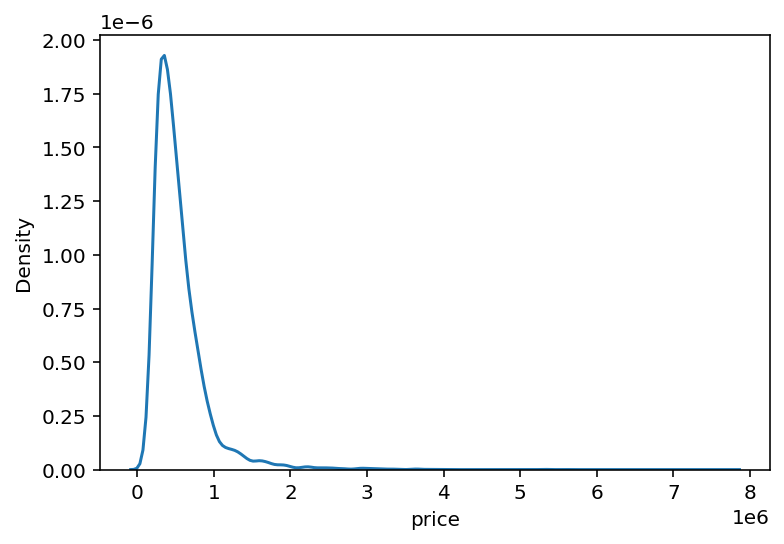

In [10]:
# 원래 price의 분포
sns.kdeplot(y)
plt.show()

In [11]:
# log 변환
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

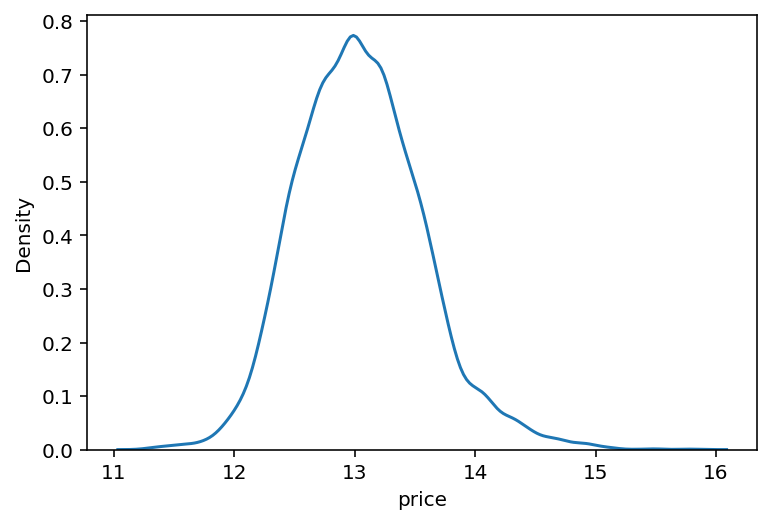

In [12]:
# log 변환 후 분포 확인

sns.kdeplot(y)
plt.show()

In [13]:
#  원래 데이터의 단위에 맞게 되돌리기 위해 np.expm1()을 추가하여
#  exp로 다시 변환해서 mean_squared_error를 계산한 값에 np.sqrt 

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
# 값고정
random_state=2020 
# 네 가지 모델을 가져오기
gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]


In [14]:
def get_scores(models, train, y):
    df = {}

    for model in models:
    
        model_name = model.__class__.__name__

    # train, test 데이터셋 분리
        train_X,test_X, train_y, test_y = train_test_split(train,y, test_size=0.2, random_state=random_state)
    # 모델 학습
        model.fit(train_X,train_y)
    # 예측
    
        pred_y = model.predict(test_X)

    # 예측 결과의 rmse값 저장
        df[model_name] = rmse(test_y,pred_y)
    
    # data frame에 저장
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    return score_df

get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
LGBMRegressor,111920.367359
XGBRegressor,110318.669566


In [15]:
### grid search 함수
def my_GridSearch(model, train, y, param_grid, verbose=1,cv=2, n_jobs=-1):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [16]:
## 예측 결과 저장함수
def save_submission(prediction,model_name = 'averageblending'):

    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}.csv'.format(data_dir, model_name)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [17]:
### 하이퍼 파라미터 지정
gboost_params = {
    'n_estimators': [200,400],
    'learning_rate': [0.01, 0.02],
    'max_depth': [3, 10]

}


rdforest_params = {
    'n_estimators': [200, 100],
    'max_depth': [10, 12],
    'min_samples_split': [8, 4]
}

lightgbm_params = {
    'n_estimators': [ 300,2000],
    'learning_rate': [0.2,0.1,0.02],
    'max_depth': [3,20]
}


xgboost_params = {
    'n_estimators': [100,2000],
    'learning_rate': [0.06,0.02],
    'max_depth': [3, 5]
}

########## 아래설명
# from tqdm import tqdm
# params = [gboost_params, rdforest_params , lightgbm_params, xgboost_params]

# results_list = []

# # 각 모델에 대한 하이퍼파라미터 튜닝을 위한 루프
# for model, param_grid in tqdm(zip(models, params)):
#     # GridSearchCV 모델로 초기화 및 결과 저장
#     results = my_GridSearch(model, train_data, y_train, param_grid, verbose=2, n_jobs=5)
    
#     # 결과를 리스트에 추가
#     results_list.append(results)

# 한번에 돌려서 모든 지정해둔 최적의 하이퍼파라미터를 찾는 방법이지만 매우 오래걸린다.
# tqdm은 반복의 객체에서 사용시에 밑에 어느정도 진행되고 있는지 나온다

In [18]:
## 모델에 대한 리스트는 위에 선언하였기에 여기서는 models로만 바로 사용
# params = [gboost_params, xgboost_params, lightgbm_params, rdforest_params]
# my_GridSearch(gboost, train, y, gboost_params)



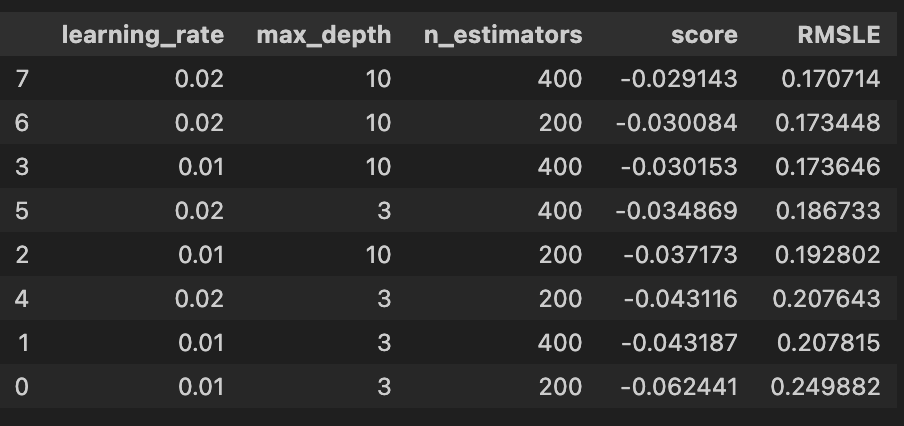

In [19]:
# my_GridSearch(rdforest, train, y, rdforest_params)

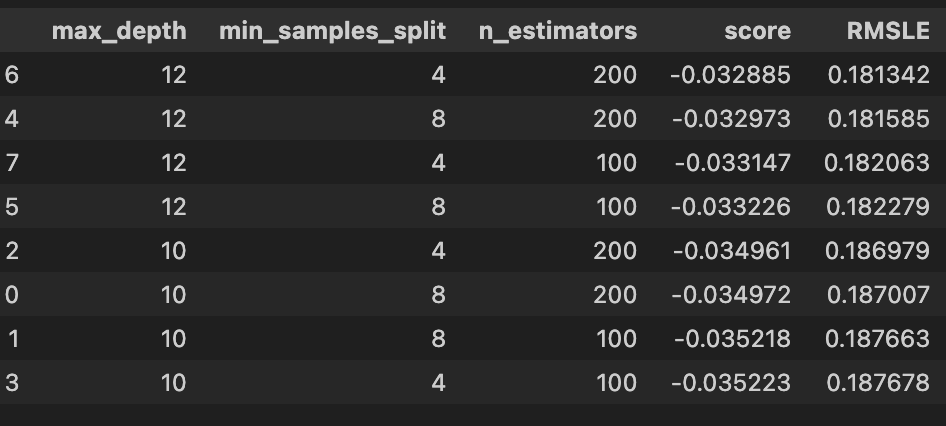

In [20]:
# my_GridSearch(lightgbm, train, y, lightgbm_params)

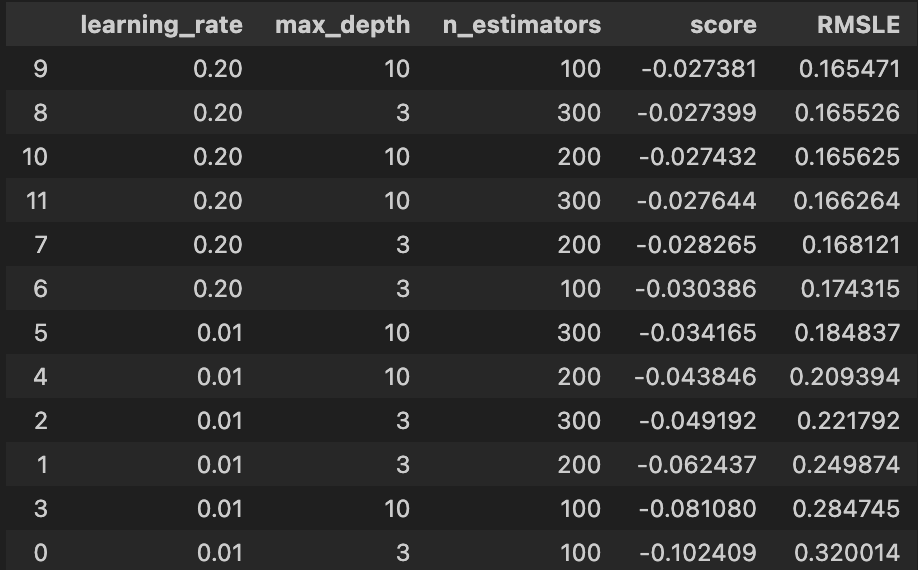

In [21]:
# my_GridSearch(xgboost, train, y, xgboost_params)

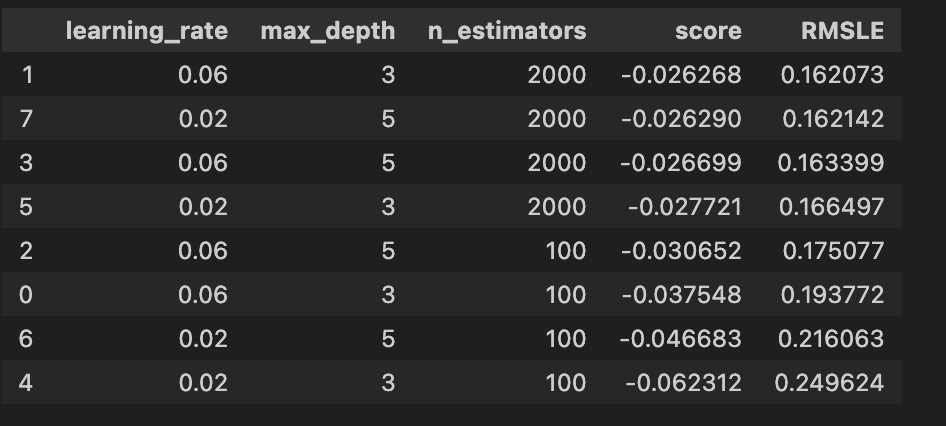

In [ ]:
### 위에서 나온 것들을 토대로 학습 및, 예측
gboost = GradientBoostingRegressor(learning_rate = 0.02, max_depth=10,n_estimators = 1600,random_state=random_state)
rdforest = RandomForestRegressor(max_depth=12,min_samples_split=5,n_estimators=2000,random_state=random_state)
lightgbm = LGBMRegressor(learning_rate = 0.20,max_depth=15,n_estimators = 1600,type='gbdt',random_state=random_state)
xgboost = XGBRegressor(learning_rate = 0.06,max_depth=10,n_estimators = 2000,random_state=random_state)
gboost.fit(train, y)
rdforest.fit(train, y)
lightgbm.fit(train,y)
xgboost.fit(train,y)

## 예측
y_pred_gboost = gboost.predict(test)
y_pred_rdforest = rdforest.predict(test)
y_pred_lightgbm = lightgbm.predict(test)
y_pred_xgboost = xgboost.predict(test)


In [ ]:
print(y_pred_gboost,y_pred_rdforest,y_pred_lightgbm,y_pred_xgboost)

In [ ]:
### 평균으로 최종 모델예측 생성 -> average blending
final_pred = (y_pred_gboost+y_pred_rdforest+y_pred_lightgbm+y_pred_xgboost) / 4
final_pred

In [ ]:
# 최종 예측
final_pred = np.expm1(final_pred)
final_pred

In [ ]:
save_submission(final_pred,model_name = 'averageblending')

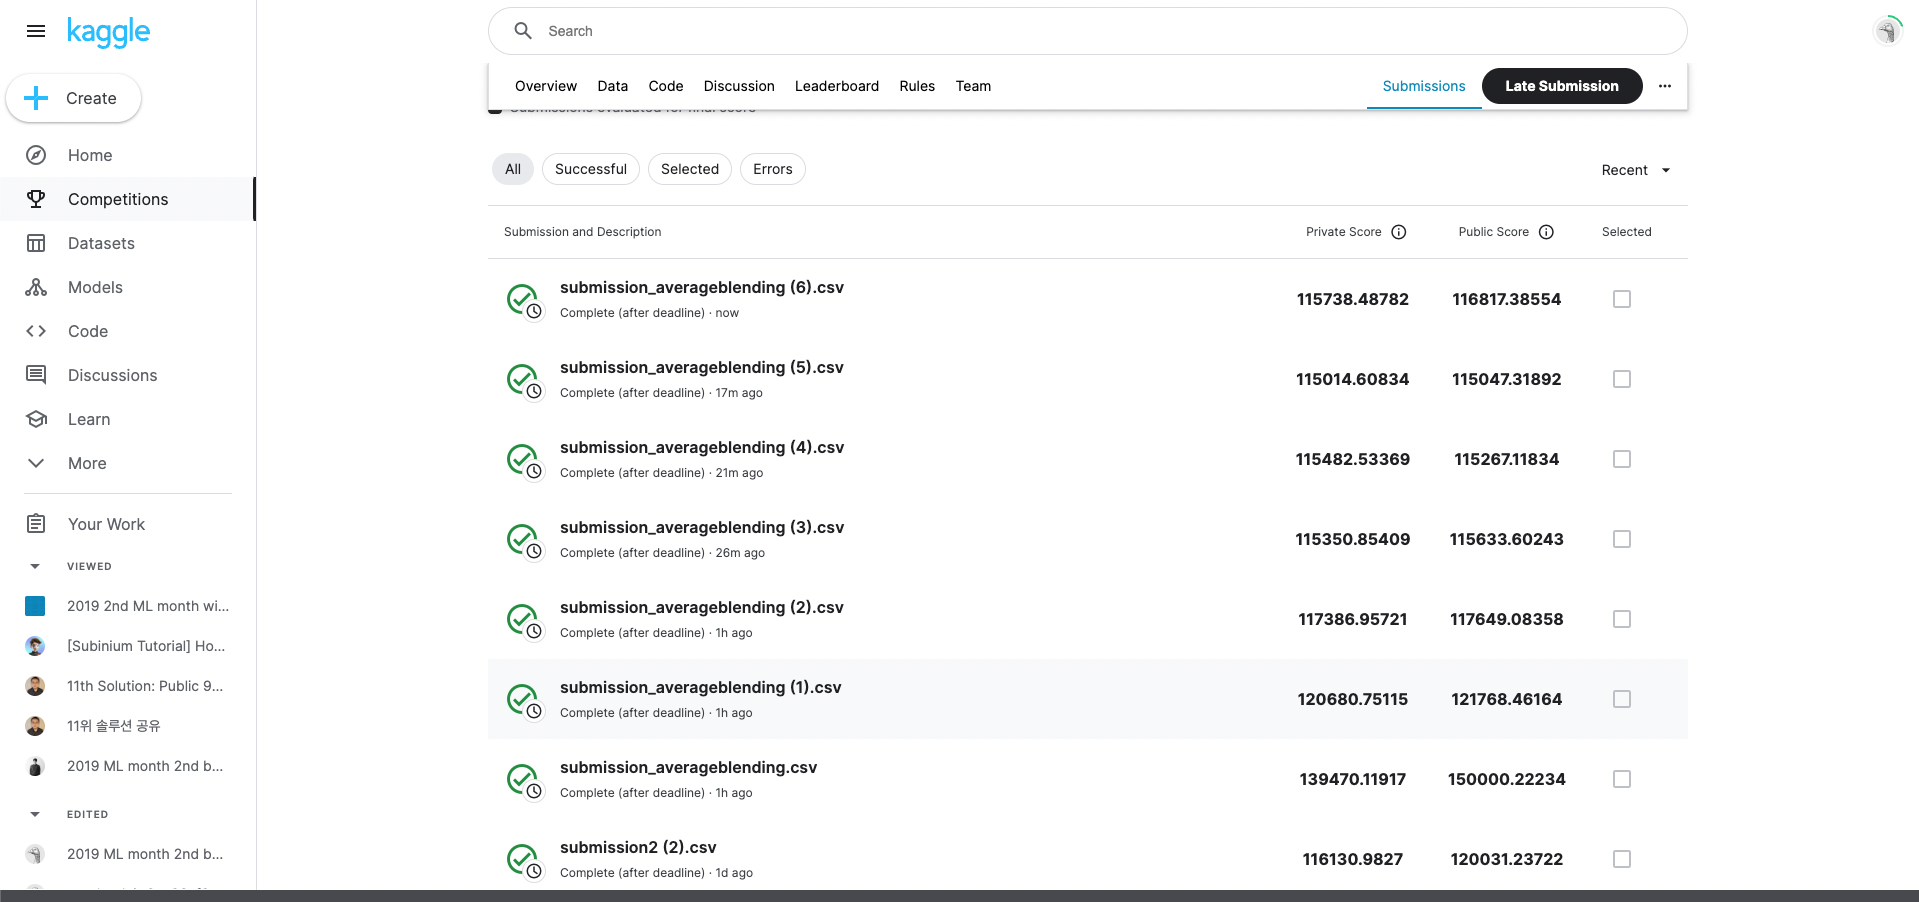

### 프로젝트 목표

> - 캐글의 따라해보기 데이터 전처리부터 모델 적용까지

### 성과 및 결과

> - 다양한 모델들의 하이퍼파라미터를 조정하여 예측값을 조정
> - 시간이 걸리긴 하였지만 할수록 시간이 줄어든다
### 배운 점

> - 다양한 예측 모델을 사용하여 데이터 전처리부터 학습, 예측 및 평가로 이어지는 전과정을 직접 코드를 작성하며 수행할 수 있었다.
> - 에버리지 블랜딩을 사용해서 직접 적용하였다

### 개선할 점 및 아쉬운 점

> - 시간이 너무 오래 걸린다.
> - 그리드 서치를 하는 시간이 오래걸리고 클라우드에서 너무 느리게 돌아간다.

### 느낀점

> - 시간이 오래걸려서 환경의 중요함을 꺠닫게 되었다


### 결론

> - 이번 프로젝트를 통해 차량 수요 예측에 다양한 예측 모델을 적용하고 캐글에 제출해보았다.